In [1]:
# Importing required libraries for EDA
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Walmart.csv")
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


### Data Cleaning

In [4]:
df.shape

(10051, 11)

In [5]:
df.info()
# it gives the datatype and null values about thge column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [6]:
df.describe() # this inbulit function gives the statical analysis about the dataset

,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


In [7]:
#all duplicates
df.duplicated().sum()

np.int64(51)

In [8]:
#remove duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [9]:
df.shape

(10000, 11)

In [10]:
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [11]:
#dropping all rows with missing records
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

In [13]:
df.dtypes
# here the unitprice is in object , it should be in number

invoice_id          int64
Branch             object
City               object
category           object
unit_price         object
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

In [14]:
 df['unit_price'] = df['unit_price'].str.replace('$', '').astype(float)

In [15]:
df.dtypes

invoice_id          int64
Branch             object
City               object
category           object
unit_price        float64
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      9969 non-null   int64  
 1   Branch          9969 non-null   object 
 2   City            9969 non-null   object 
 3   category        9969 non-null   object 
 4   unit_price      9969 non-null   float64
 5   quantity        9969 non-null   float64
 6   date            9969 non-null   object 
 7   time            9969 non-null   object 
 8   payment_method  9969 non-null   object 
 9   rating          9969 non-null   float64
 10  profit_margin   9969 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 934.6+ KB


In [24]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [16]:
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

In [17]:
df.columns= df.columns.str.lower()
df.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

In [18]:
df['quantity']=df['quantity'].astype(int)

In [19]:
# i want total of the sales , so i am adding the column to the dataset total

df['total'] = df['unit_price'] * df['quantity'] 
df.head()

,invoice_id,branch,city,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total
0,1,WALM003,San Antonio,Health and beauty,74.69,7,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


In [20]:
df.shape # this after doing the data cleaning

(9969, 12)

In [21]:
df.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total'],
      dtype='object')

In [22]:
# Convert Date Column (If Present)
df['date'] = pd.to_datetime(df['date']) # it is throwing error because the walmart folows a data format dd-mm-yyyy

C:\Users\hashi\AppData\Local\Temp\ipykernel_25216\2430962607.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date']) # it is throwing error because the walmart folows a data format dd-mm-yyyy


In [23]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')


In [24]:
df.dtypes

invoice_id                 int64
branch                    object
city                      object
category                  object
unit_price               float64
quantity                   int64
date              datetime64[ns]
time                      object
payment_method            object
rating                   float64
profit_margin            float64
total                    float64
dtype: object

In [25]:
df['total'].sum()

np.float64(1209726.38)

In [26]:
# Feature enginerring purpose
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

In [27]:
df.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total',
       'Year', 'Month'],
      dtype='object')

## Corelation between the columns 

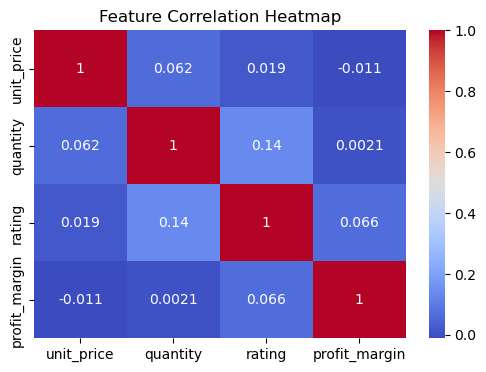

In [28]:
plt.figure(figsize=(6,4))
sns.heatmap(
   # here i have selected only numeric columns because coorelation can be caluculated between numeric columns
    df[['unit_price','quantity','rating','profit_margin']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Feature Correlation Heatmap")
plt.show()

### Rating Distribution

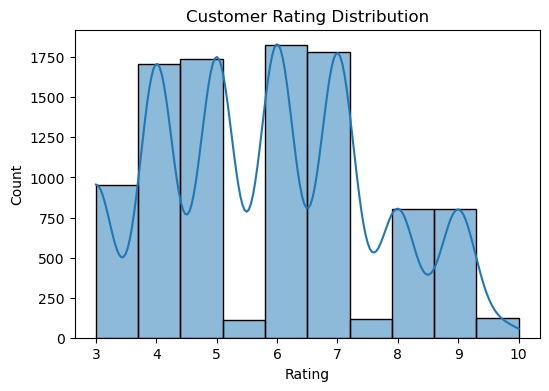

In [29]:
#understanding the customers rating are going 
plt.figure(figsize=(6,4))
sns.histplot(df['rating'], bins=10, kde=True)# kde is kenral density estimation
plt.title("Customer Rating Distribution")
plt.xlabel("Rating")
plt.show()

### Quantity Distribution

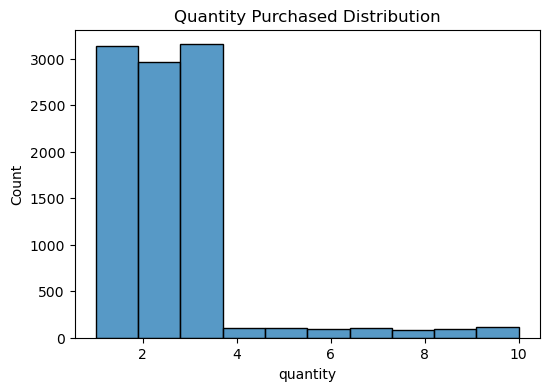

In [30]:
# it over all the quantities they sold 
plt.figure(figsize=(6,4))
sns.histplot(df['quantity'], bins=10)
plt.title("Quantity Purchased Distribution")
plt.show()

### Category Distribution

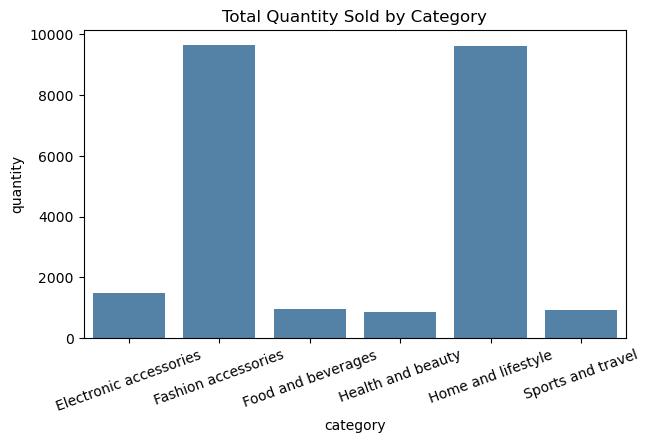

In [31]:
# which category sells the most sold and less sold in over all 

category_qty = df.groupby('category')['quantity'].sum().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=category_qty, x='category', y='quantity', color='steelblue')
plt.title("Total Quantity Sold by Category")
plt.xticks(rotation=20)
plt.show() 

In [ ]:
### Sales by payments methods

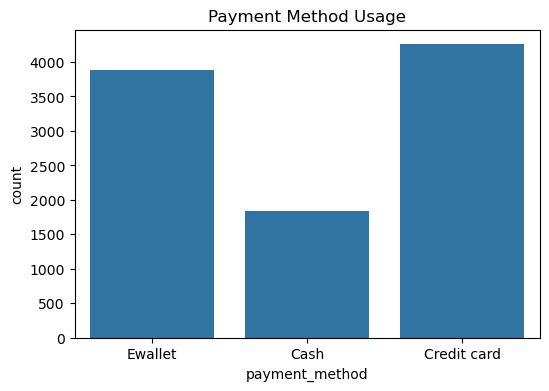

In [32]:
# it is just for references only
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='payment_method')
plt.title("Payment Method Usage")
plt.show()

### factors influence whether a branch should stock up a category in a given month?

#### MONTH ↔ QUANTITY (SEASONAL DEMAND)

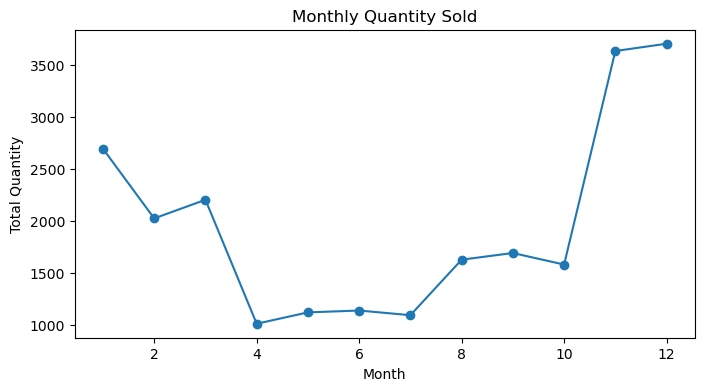

In [36]:
df['month'] = df['date'].dt.month

monthly_qty = df.groupby('month')['quantity'].sum().reset_index()

plt.figure(figsize=(8,4))
plt.plot(monthly_qty['month'], monthly_qty['quantity'], marker='o')
plt.title("Monthly Quantity Sold")
plt.xlabel("Month")
plt.ylabel("Total Quantity")
plt.show()


#### CATEGORY , MONTH , QUANTITY

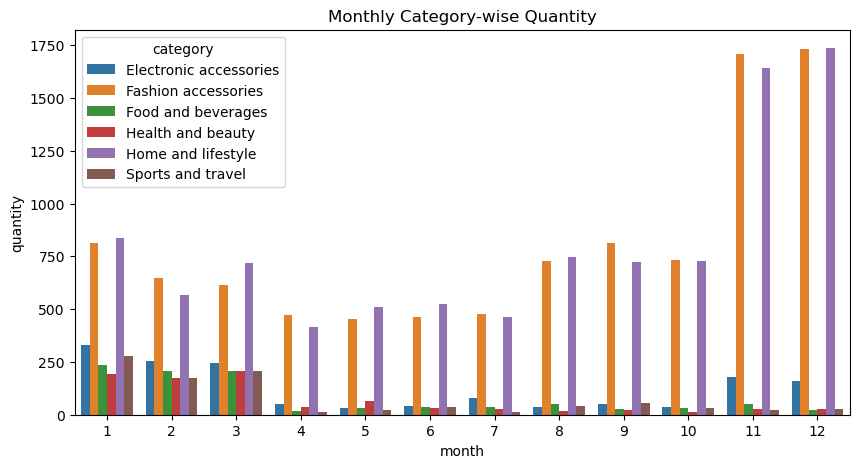

In [37]:
monthly_cat = (
    df.groupby(['month','category'])['quantity']
    .sum()
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(data=monthly_cat, x='month', y='quantity', hue='category')
plt.title("Monthly Category-wise Quantity")
plt.show()


##### BRANCH , MONTH, QUANTITY 

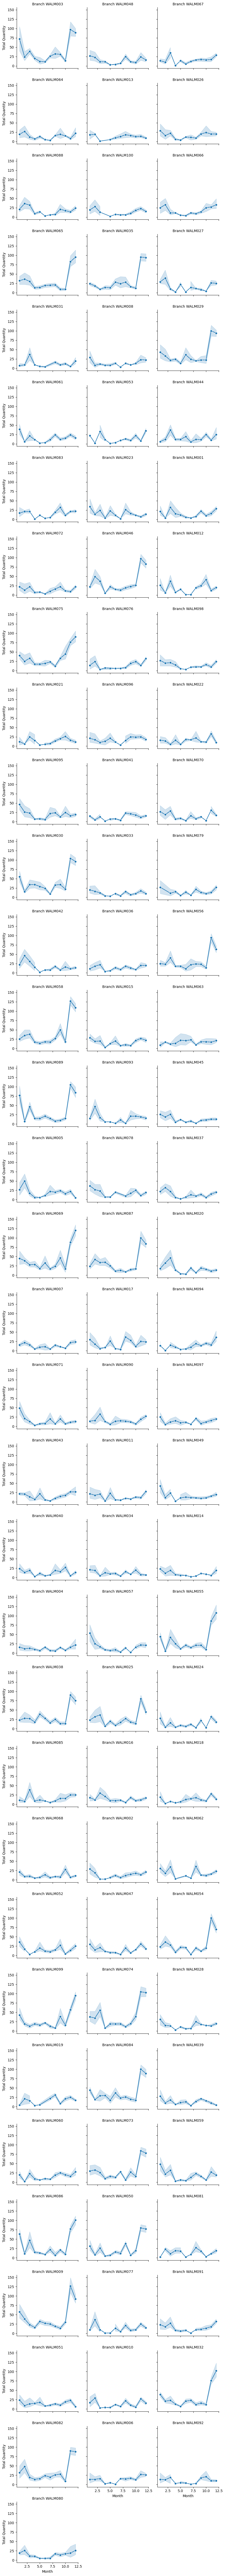

In [41]:
g = sns.FacetGrid(df, col="branch", col_wrap=3, height=3, sharey=True)
g.map_dataframe(
    sns.lineplot,
    x="month",
    y="quantity",
    estimator="sum",
    marker="o"
)
g.set_titles("Branch {col_name}")
g.set_axis_labels("Month", "Total Quantity")
plt.show()


#### Category Demand

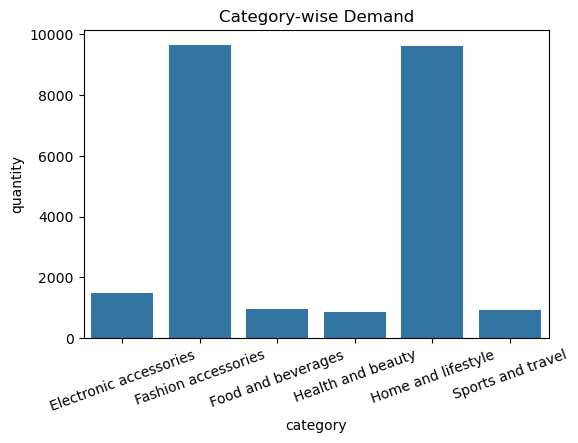

In [42]:
cat_qty = df.groupby('category')['quantity'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=cat_qty, x='category', y='quantity')
plt.xticks(rotation=20)
plt.title("Category-wise Demand")
plt.show()


#### Quantity Distribution

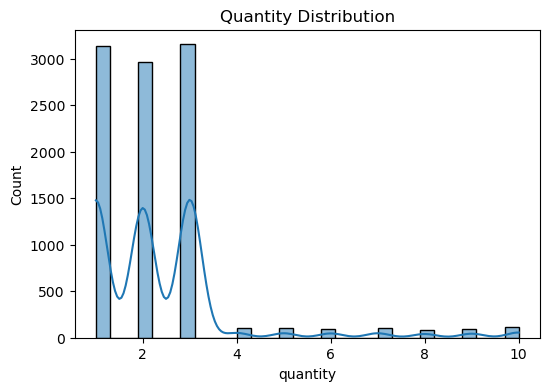

In [44]:
plt.figure(figsize=(6,4))
sns.histplot(df['quantity'], bins=30, kde=True)
plt.title("Quantity Distribution")
plt.show()

## CREATE TARGET VARIABLE

#### Stock-Up Label

In [45]:
## Stock up if current quantity > average monthly quantity(branch+ category + month)

monthly_avg = (
    df.groupby(['branch','category','month'])['quantity']
    .mean()
    .reset_index()
    .rename(columns={'quantity':'avg_qty'})
)

df = df.merge(monthly_avg, on=['branch','category','month'])

df['stock_up'] = (df['quantity'] > df['avg_qty']).astype(int)


#### Feature ↔ Target Relationship

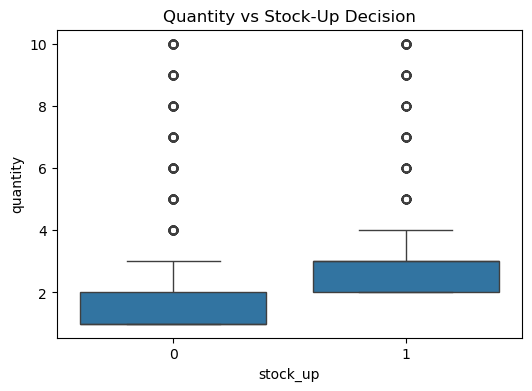

In [46]:
## quantity vs stock

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='stock_up', y='quantity')
plt.title("Quantity vs Stock-Up Decision")
plt.show()

# stock -up 0 normal stocking up
#    1 means need to be stocked more 

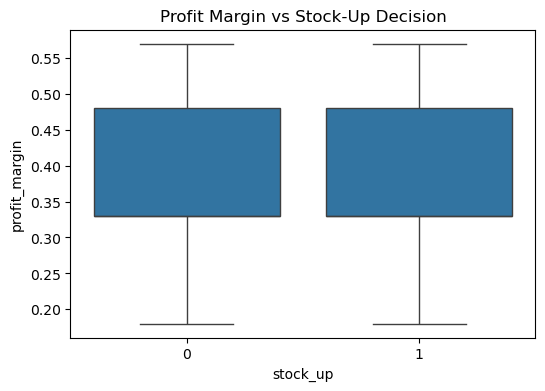

In [47]:
# profit margin vs stock-up

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='stock_up', y='profit_margin')
plt.title("Profit Margin vs Stock-Up Decision")
plt.show()

# The box plot shows that profit margin alone does not determine stock-up decisions; 
# high demand products may require stocking even with moderate profit margins.

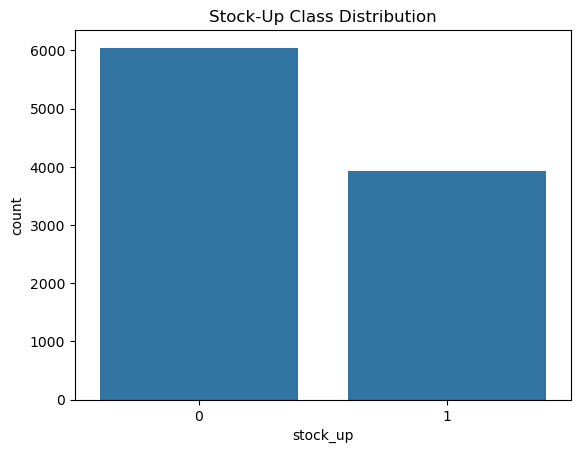

In [48]:
# Class balance 
# this one is for , to make sure the data we have good amount cases to train for both conditions(0 and 1)
# otherwise we need to be increase the data or to make classes to be balanced
sns.countplot(x='stock_up', data=df)
plt.title("Stock-Up Class Distribution")
plt.show()


# WHAT IS LOGISTIC REGRESSION

## Logistic Regression

**Definition:**  
Logistic Regression is a **supervised learning classification algorithm** used to predict the **probability of a categorical outcome**, mainly for **binary classification** problems.

**Key Points:**
- Output is a probability between **0 and 1**
- Uses the **sigmoid function**
- Used for classification, not regression

## Sigmoid Function

**Definition:**  
The sigmoid function maps any real-valued number into a value between **0 and 1**.

**Formula:**


**Key Points:**
- Used in **binary classification**
- Output represents probability
- Decision threshold is usually **0.5**

## Softmax Function

**Definition:**  
The softmax function converts a vector of real values into a **probability distribution**, where the sum of probabilities equals **1**.

**Formula:**


**Key Points:**
- Used for **multi-class classification**
- Produces probability for each class
- Highest probability → predicted class

## Multinomial Logistic Regression

**Definition:**  
Multinomial Logistic Regression is an extension of logistic regression used when the **target variable has more than two classes**.

**Key Points:**
- Uses the **softmax function**
- Classes are **mutually exclusive**
- Example: digit recognition, product categories

## BUILD LOGISTIC REGRESSION MODEL

In [49]:
# Select Features & Target
X = df[['branch','category','month','quantity','profit_margin','rating']]
y = df['stock_up']

In [51]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [54]:
# Preprocessing + Model Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# diff between the numbers and categories(strings)
cat_features = ['branch','category']
num_features = ['month','quantity','profit_margin','rating']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [55]:
## Train Model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['branch', 'category']),
                                                 ('num', StandardScaler(),
                                                  ['month', 'quantity',
                                                   'profit_margin',
                                                   'rating'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

# Confusion Matrix

## Confusion Matrix

**Definition:**  
A confusion matrix is a table that summarizes the performance of a classification model by comparing **actual and predicted values**.

|                | Predicted Positive | Predicted Negative |
|----------------|-------------------|-------------------|
| Actual Positive | True Positive (TP) | False Negative (FN) |
| Actual Negative | False Positive (FP) | True Negative (TN) |

## True Positive, True Negative, False Positive, False Negative

**True Positive (TP):**  
The model correctly predicts the **positive class**.  
- Actual = Positive  
- Predicted = Positive  
*Example:* Patient has a disease and the model predicts disease.

**True Negative (TN):**  
The model correctly predicts the **negative class**.  
- Actual = Negative  
- Predicted = Negative  
*Example:* Patient does not have a disease and the model predicts no disease.

**False Positive (FP):**  
The model incorrectly predicts the **positive class** for a negative case.  
- Actual = Negative  
- Predicted = Positive  
*Example:* An email is not spam but the model predicts spam.

**False Negative (FN):**  
The model incorrectly predicts the **negative class** for a positive case.  
- Actual = Positive  
- Predicted = Negative  
*Example:* Patient has a disease but the model predicts no disease.

### Summary Table

| Term | Actual | Predicted | Description |
|------|--------|-----------|-------------|
| TP | Positive | Positive | Correct positive prediction |
| TN | Negative | Negative | Correct negative prediction |
| FP | Negative | Positive | Incorrect positive prediction |
| FN | Positive | Negative | Incorrect negative prediction |

## Accuracy

**Definition:**  
Accuracy measures the **overall correctness** of the model.

**Formula:**
\[
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\]

**Note:**  
Accuracy is not reliable for **imbalanced datasets**.

## Precision

**Definition:**  
Precision measures how many **predicted positive cases are actually positive**.

**Formula:**
\[
Precision = \frac{TP}{TP + FP}
\]

**Used when:**  
False positives are costly.

## Recall (Sensitivity / True Positive Rate)

**Definition:**  
Recall measures how many **actual positive cases are correctly identified**.

**Formula:**
\[
Recall = \frac{TP}{TP + FN}
\]

**Used when:**  
Missing positive cases is dangerous.

## F1-Score

**Definition:**  
F1-score is the **harmonic mean of precision and recall**.

**Formula:**
\[
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
\]

**Used when:**  
Balance between precision and recall is needed.

## Specificity (True Negative Rate)

**Definition:**  
Specificity measures how well the model correctly identifies **negative cases**.

**Formula:**
\[
Specificity = \frac{TN}{TN + FP}
\]

## ROC Curve (Receiver Operating Characteristic)

**Definition:**  
ROC curve shows the relationship between **True Positive Rate (Recall)** and **False Positive Rate** at different classification thresholds.

**Axes:**
- X-axis → False Positive Rate (FPR)
- Y-axis → True Positive Rate (TPR)


## AUC (Area Under the Curve)

**Definition:**  
AUC measures the model’s ability to **distinguish between classes**.

**Range:**
- 0.5 → random classifier
- 1.0 → perfect classifier

Higher AUC indicates a better model.

In [57]:
# Evaluate Model
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8231046931407943

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1512
           1       0.80      0.74      0.77       981

    accuracy                           0.82      2493
   macro avg       0.82      0.81      0.81      2493
weighted avg       0.82      0.82      0.82      2493



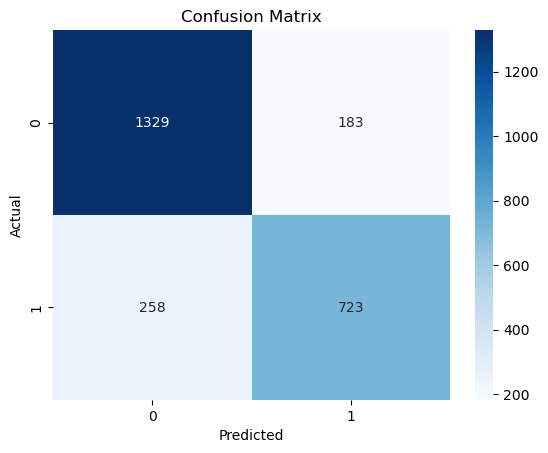

In [59]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [64]:
prediction = model.predict(X_test)
# 1 for stock -up 
# 0 for not to stock -up

[1 0 1 ... 0 0 0]


In [61]:
sample = pd.DataFrame({
    'branch': ['A'],
    'category': ['Beverages'],
    'month': [3],
    'quantity': [40],
    'profit_margin': [0.12],
    'rating': [8.5]
})

answer = model.predict(sample)

if answer[0] == 1:
    print("Stock up required")
else:
    print("No stock-up required")


Stock up required


In [62]:
prob = model.predict_proba(sample)

print("Probability of stock-up:", prob[0][1])


Probability of stock-up: 1.0


In [67]:
df['stock_up_prediction'] = model.predict(X)
df['stock_up_probability'] = model.predict_proba(X)[:, 1]

df[['branch','category','month','stock_up_prediction','stock_up_probability']].head(20)


,branch,category,month,stock_up_prediction,stock_up_probability
0,WALM003,Health and beauty,5,0,0.023256
1,WALM048,Electronic accessories,8,1,0.540134
2,WALM067,Home and lifestyle,3,1,0.998891
3,WALM064,Health and beauty,1,0,0.057812
4,WALM013,Sports and travel,8,0,0.033467
5,WALM026,Electronic accessories,3,1,0.954251
6,WALM088,Electronic accessories,2,1,0.795993
7,WALM100,Home and lifestyle,2,1,0.999988
8,WALM066,Health and beauty,10,0,0.000006
9,WALM065,Food and beverages,2,0,0.000044


## ROC Curve and AUC – sklearn Example

This example shows how to compute and plot the **ROC curve** and calculate the **AUC score** using predicted probabilities from a classification model.

Key Points:
- ROC uses **probability scores**, not class labels
- X-axis → False Positive Rate (FPR)
- Y-axis → True Positive Rate (TPR / Recall)
- AUC measures overall model discrimination ability

![ROC and AUC](roc_and auc.png)


## Trade-off Between Precision and Recall

**Definition:**  
Precision and recall have an **inverse relationship** — improving one often reduces the other.

**Key Points:**
- Higher threshold → higher precision, lower recall
- Lower threshold → higher recall, lower precision

**Examples:**
- Medical diagnosis → prioritize recall
- Spam detection → prioritize precision

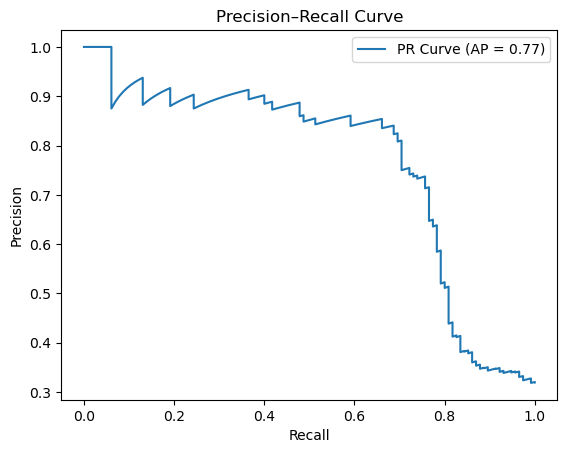

np.float64(0.7665396106504792)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    precision_recall_curve,
    average_precision_score,
    precision_score,
    recall_score,
    f1_score
)

# 1) Create sample dataset
X, y = make_classification(
    n_samples=1200,
    n_features=6,
    n_informative=4,
    n_redundant=0,
    weights=[0.7, 0.3],     # slightly imbalanced
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2) Train a model
model = LogisticRegression()
model.fit(X_train, y_train)

# 3) Predicted probabilities for positive class
y_prob = model.predict_proba(X_test)[:, 1]

# 4) Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Average Precision (summary like AUC but for PR curve)
ap = average_precision_score(y_test, y_prob)

# Plot PR curve
plt.figure()
plt.plot(recall, precision, label=f"PR Curve (AP = {ap:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()

ap


## Precision–Recall Curve

**Definition:**  
The Precision–Recall (PR) curve shows the relationship between **precision** and **recall** for different classification thresholds.

---

### What the Axes Represent
- **X-axis → Recall** (TP / (TP + FN))
- **Y-axis → Precision** (TP / (TP + FP))

Each point on the curve corresponds to a **different decision threshold**.

---

### Why Precision–Recall Curve Is Used
- Especially useful for **imbalanced datasets**
- Focuses only on the **positive class**
- Shows how improving recall affects precision and vice versa

---

### How the Curve Is Formed
1. The model outputs probability scores.
2. The classification threshold is changed from **1 → 0**.
3. For each threshold, precision and recall are calculated.
4. Precision is plotted against recall.

---

### Interpretation of the Curve
- Curve closer to the **top-right corner** → better model
- High precision and high recall → ideal but rare
- Sharp drop in precision → many false positives

---

### Average Precision (AP)
- AP summarizes the PR curve into a **single number**
- Higher AP indicates better overall precision–recall performance

---

### When to Prefer PR Curve Over ROC Curve
- When the dataset is **highly imbalanced**
- When the **positive class is more important**
- When false positives or false negatives have high cost
